## Assignment 1
* Use the data from heights_weights_genders.csv to create a simple predictor that takes in a person's height and guesses their weight based on a model using all the data, regardless of gender
* Find the weights and use those in your function (i.e. don't generate a model each time)

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/zhizhou/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/zhizhou/.matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
df = pd.read_csv("../data/heights_weights_genders.csv")

In [4]:
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
lm = smf.ols(formula="Weight~Height",data=df).fit() 

In [6]:
lm.params

Intercept   -350.737192
Height         7.717288
dtype: float64

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Tue, 26 Jul 2016   Prob (F-statistic):               0.00
Time:                        14:36:44   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -350.7372      2.111   -166.109      0.000      -354.876  -346.598
Height         7.7173      0.032    242.975      0.000         7.655     7.780
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
intercept, slope = lm.params

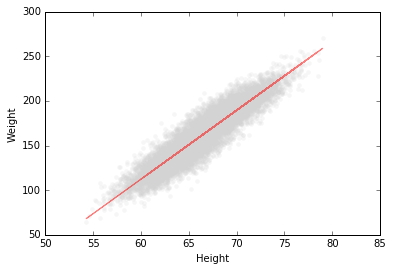

In [18]:
df.plot(kind="scatter",x="Height",y="Weight",color='lightgray',alpha=0.2,linewidth=0)
plt.plot(df["Height"],slope*df["Height"]+intercept,"-",color="red",alpha=0.5)

In [22]:
print("The function is: weight =", slope,"* height",intercept)

The function is: weight = 7.71728764079 * height -350.737191812


In [23]:
def get_weight(height):
    for item in df['Weight']:
        intercept = -350.737
        weight = height * 7.7 + intercept
    return round(weight)